In [2]:
from lifetimes import BetaGeoFitter, ParetoNBDFitter

In [3]:
import lifetimes
from lifetimes.fitters import pareto_nbd_fitter 
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.utils import expected_cumulative_transactions

import pandas as pd 
df = pd.read_csv("globbing.csv")
summary = lifetimes.utils.summary_data_from_transaction_data(df, 'Customer', 'Date')
summary['frequency'], summary['recency'], summary['T']
# model = ParetoNBDFitter(penalizer_coef=0.0)
# model.fit(summary['frequency'],  summary['recency'],summary['T'])
# conditional_probability_alive = model.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
 
summary_cal_holdout = calibration_and_holdout_data(
    df,'Customer', 'Date',
    calibration_period_end=pd.to_datetime('2022-11-11'),
    observation_period_end=df['Date'].max()
)
summary_cal_holdout
model = lifetimes.ParetoNBDFitter(penalizer_coef=0.01)
model.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
 
freq = 'D' # days
number_of_days = 14
a = model.conditional_probability_alive(
        
        summary['frequency'], summary['recency'], summary['T'])
a



Customer
AAR366684    1.0
ABA698150    1.0
ABF381333    1.0
ABK932885    1.0
ABN926423    1.0
            ... 
ZXR743103    1.0
ZYG138944    1.0
ZYH255892    1.0
ZYV898429    1.0
ZYY880092    1.0
Length: 1991, dtype: float64

In [33]:
from lifetimes import ParetoNBDFitter 
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.utils import expected_cumulative_transactions
import pandas as pd 

df = pd.read_csv("globbing.csv")
summary = lifetimes.utils.summary_data_from_transaction_data(df, 'Customer', 'Date')
summary['frequency'], summary['recency'], summary['T']

model = ParetoNBDFitter(penalizer_coef=0.0)
model.fit(summary['frequency'], summary['recency'], summary['T'])

freq = 'D' # days
number_of_days = 14

a = model.conditional_expected_number_of_purchases_up_to_time(
    number_of_days, 
    summary['frequency'].values, 
    summary['recency'].values, 
    summary['T'].values
)
a


array([0.46617723, 1.21950798, 0.54805192, ..., 0.49994046, 0.36499105,
       1.1790496 ])

In [38]:
from lifetimes import ParetoNBDFitter 
from lifetimes.utils import summary_data_from_transaction_data
import pandas as pd 

df = pd.read_csv("globbing.csv")
summary = summary_data_from_transaction_data(df, 'Customer', 'Date')
summary['frequency'], summary['recency'], summary['T']

model = ParetoNBDFitter(penalizer_coef=0.0)
model.fit(summary['frequency'], summary['recency'], summary['T'])

freq = 'D' # days
number_of_days = 14

summary['expected_purchases'] = model.conditional_expected_number_of_purchases_up_to_time(
    number_of_days, 
    summary['frequency'].values, 
    summary['recency'].values, 
    summary['T'].values
)

# create a new dataframe with the customer column and expected purchases
result_df = pd.DataFrame({
    'Customer': summary.index,
    'Expected_Purchases': summary['expected_purchases']
})
result_df

,Customer,Expected_Purchases
Customer,,
AAR366684,AAR366684,0.395132
ABA698150,ABA698150,1.291208
ABF381333,ABF381333,0.528769
ABK932885,ABK932885,1.259369
ABN926423,ABN926423,0.791545
...,...,...
ZXR743103,ZXR743103,0.603091
ZYG138944,ZYG138944,1.233807
ZYH255892,ZYH255892,0.473298


In [8]:
from datetime import datetime
import pandas as pd
import pandas as pd
import numpy as np
from lifetimes import GammaGammaFitter
from lifetimes import BetaGeoFitter
import datetime as dt
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

df = pd.read_csv("globbing.csv")

today_date = datetime.today()
cltv_df = df.groupby('Customer').agg({'Date': [lambda date: (date.max() - date.min()).days,
                                                     lambda date: (today_date - date.min()).days],
                                           'InvoiceId':      lambda num: num.nunique(),
                                           'Product price':   lambda TotalPrice: TotalPrice.sum()})

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [1]:
from zenq.api import endpoints

Enter your database credentials
Username: aua
Password: mysecretpassword
Database name: GLOBBING


In [1]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('globbing.csv')

# Group the data by customer and count the number of invoices
grouped = df.groupby('Customer').agg({'InvoiceId': 'count'})

# Select only the customers with one invoice
result = grouped[grouped['InvoiceId'] == 1]

# Print the result
print(result)


           InvoiceId
Customer            
AAR366684          1
ATB262249          1
BRS840990          1
BSF439593          1
CKI107410          1
DAX787715          1
DFZ837701          1
DSE737276          1
EUF556994          1
GGL431742          1
GXL480310          1
HAH608808          1
IAY208308          1
IQN294014          1
IWU303142          1
JZG281834          1
KFT548996          1
KPO670477          1
KXH974893          1
LFG253534          1
NJM647149          1
OLY631292          1
RWD468759          1
SJZ770260          1
TNU309606          1
UCA347124          1
UYP958102          1
VXJ691842          1
XHB937113          1
XVA214225          1


In [1]:
from zenq.api import prepare_db

In [5]:
from zenq.visualizations import plot

In [6]:
from zenq import utils

In [7]:
plot.PlotUtils.pu()

ok
None


In [1]:
from zenq.api.prepare_db import db
m=db()
m.main()

Enter your database credentials
Username: aua
Password: mysecretpassword
Database name: GLOBBING
Initializing the database.. done


# Database

In [9]:
from zenq.logger import CustomFormatter, bcolors
import logging 

In [10]:
import os 
print(__name__)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
ch.setFormatter(CustomFormatter())
logger.addHandler(ch)

logger.debug("debug message")
logger.info(f"{bcolors.OKGREEN} Warning: Email has not been sent......{bcolors.OKGREEN}")
logger.warning("warning message")
logger.error("error message")
logger.critical("critical message")

2023-04-21 20:19:38,503 - __main__ - DEBUG - debug message (789279774.py:10)
2023-04-21 20:19:38,505 - __main__ - INFO -  Warning: Email has not been sent...... (789279774.py:11)
2023-04-21 20:19:38,506 - __main__ - WARNING - warning message (789279774.py:12)
2023-04-21 20:19:38,507 - __main__ - ERROR - error message (789279774.py:13)
2023-04-21 20:19:38,508 - __main__ - CRITICAL - critical message (789279774.py:14)


__main__


In [1]:
from zenq.api.endpoints import points
points_instance = points('globbing.csv')
points_instance.insert_facts()



Enter your database credentials
Username: aua
Password: mysecretpassword
Database name: GLOBBING


Dropdown(description='Map to customer_id', options=('Customer', 'Date', 'Product weight', 'Product price', 'Ge…

Dropdown(description='Map to gender', options=('Customer', 'Date', 'Product weight', 'Product price', 'Gender'…

Dropdown(description='Map to invoice_id', options=('Customer', 'Date', 'Product weight', 'Product price', 'Gen…

Dropdown(description='Map to date', options=('Customer', 'Date', 'Product weight', 'Product price', 'Gender', …

Dropdown(description='Map to quantity', options=('Customer', 'Date', 'Product weight', 'Product price', 'Gende…

Dropdown(description='Map to total_price', options=('Customer', 'Date', 'Product weight', 'Product price', 'Ge…

Button(description='Submit', style=ButtonStyle())

Output()

In [4]:
from zenq.clvmodels.pareto import Model
model = Model()

result = model.cltv_df()
# print('Length of df_data_group:', len(result))

result


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %


,customer_id,min_date,recency,T,frequency,monetary
0,KVO444312,2022-09-13,163,227,14,255590.0
1,VBV804469,2022-09-04,200,236,14,310880.0
2,BAE240832,2022-09-13,196,227,3,39005.0
3,AOK457989,2022-09-14,189,226,5,111895.0
4,XZF813575,2022-09-05,179,235,11,223440.0
...,...,...,...,...,...,...
1956,DXT747575,2022-09-12,206,228,7,114810.0
1957,VOZ592840,2023-01-14,52,104,2,51295.0
1958,ZCQ782298,2022-09-13,207,227,20,465100.0
1959,YNW866090,2022-09-02,143,238,11,238605.0


In [5]:
from lifetimes import ParetoNBDFitter

from zenq.clvmodels.pareto import Model
model = Model()
result = model.fit_paretonbd()
# print('Length of df_data_group:', len(result))
freq=result.params_ 
freq

Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


r             7.023801
alpha       129.859726
s           305.256872
beta     495422.787949
dtype: float64

In [1]:

from lifetimes import ParetoNBDFitter
from lifetimes import ParetoNBDFitter 
from lifetimes.utils import summary_data_from_transaction_data
import pandas as pd 
from zenq.clvmodels.pareto import Model
model = Model()

result = model.fit_paretonbd()

# print('Length of df_data_group:', len(result))

result

Enter your database credentials
Username: aua
Password: mysecretpassword
Database name: GLOBBING
Percentage of customers that only bought onece 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  225         14  255590.0
1      VBV804469 2022-09-04      200  234         14  310880.0
2      BAE240832 2022-09-13      196  225          3   39005.0
3      AOK457989 2022-09-14      189  224          5  111895.0
4      XZF813575 2022-09-05      179  233         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  226          7  114810.0
1957   VOZ592840 2023-01-14       52  102          2   51295.0
1958   ZCQ782298 2022-09-13      207  225         20  465100.0
1959   YNW866090 2022-09-02      143  236         11  238605.0
1960   IFC198488 2022-09-17      189  221          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


(<lifetimes.ParetoNBDFitter: fitted with 1960 subjects, alpha: 130.29, beta: 463881.60, r: 7.11, s: 324.06>,
 r             7.112876
 alpha       130.285868
 s           324.062222
 beta     463881.595176
 dtype: float64)

In [6]:

from lifetimes import ParetoNBDFitter
from lifetimes import ParetoNBDFitter 
from lifetimes.utils import summary_data_from_transaction_data
import pandas as pd 
from zenq.clvmodels.pareto import Model
uf = Model()

result = uf.rfm()

# print('Length of df_data_group:', len(result))

result

Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  227         14  255590.0
1      VBV804469 2022-09-04      200  236         14  310880.0
2      BAE240832 2022-09-13      196  227          3   39005.0
3      AOK457989 2022-09-14      189  226          5  111895.0
4      XZF813575 2022-09-05      179  235         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  228          7  114810.0
1957   VOZ592840 2023-01-14       52  104          2   51295.0
1958   ZCQ782298 2022-09-13      207  227         20  465100.0
1959   YNW866090 2022-09-02      143  238         11  238605.0
1960   IFC198488 2022-09-17      189  223          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning: overflow encountered in exp
  tmp = b * np.exp(a - a_max)


Percentage of customers that only bought once 0.0 %
Percentage of customers that only bought once 0.0 %


,customer_id,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,KVO444312,4,4,4,44,LOYAL CUSTOMER
1,VBV804469,2,4,4,24,AT RISK
2,BAE240832,2,1,1,21,HIBERNATING
3,AOK457989,3,1,2,31,ABOUT TO SLEEP
4,XZF813575,3,3,3,33,NEED ATTENTION
...,...,...,...,...,...,...
1956,DXT747575,1,2,2,12,HIBERNATING
1957,VOZ592840,5,1,1,51,NEW CUSTOMERS
1958,ZCQ782298,1,5,5,15,CANT LOSE
1959,YNW866090,4,3,3,43,POTENTIAL LOYALIST


In [5]:

from lifetimes import ParetoNBDFitter
from lifetimes import ParetoNBDFitter 
from lifetimes.utils import summary_data_from_transaction_data
import pandas as pd 
from zenq.clvmodels.pareto import Model
uf = Model()

result = uf.rfm()

# print('Length of df_data_group:', len(result))

result
 

Percentage of customers that only bought onece 0.0 %
Percentage of customers that only bought onece 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  226         14  255590.0
1      VBV804469 2022-09-04      200  235         14  310880.0
2      BAE240832 2022-09-13      196  226          3   39005.0
3      AOK457989 2022-09-14      189  225          5  111895.0
4      XZF813575 2022-09-05      179  234         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  227          7  114810.0
1957   VOZ592840 2023-01-14       52  103          2   51295.0
1958   ZCQ782298 2022-09-13      207  226         20  465100.0
1959   YNW866090 2022-09-02      143  237         11  238605.0
1960   IFC198488 2022-09-17      189  222          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning:

overflow encountered in exp



Percentage of customers that only bought onece 0.0 %
Percentage of customers that only bought onece 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  226         14  255590.0
1      VBV804469 2022-09-04      200  235         14  310880.0
2      BAE240832 2022-09-13      196  226          3   39005.0
3      AOK457989 2022-09-14      189  225          5  111895.0
4      XZF813575 2022-09-05      179  234         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  227          7  114810.0
1957   VOZ592840 2023-01-14       52  103          2   51295.0
1958   ZCQ782298 2022-09-13      207  226         20  465100.0
1959   YNW866090 2022-09-02      143  237         11  238605.0
1960   IFC198488 2022-09-17      189  222          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning:

overflow encountered in exp



Percentage of customers that only bought onece 0.0 %
Percentage of customers that only bought onece 0.0 %
     customer_id   min_date  recency    T  frequency  monetary
0      KVO444312 2022-09-13      163  226         14  255590.0
1      VBV804469 2022-09-04      200  235         14  310880.0
2      BAE240832 2022-09-13      196  226          3   39005.0
3      AOK457989 2022-09-14      189  225          5  111895.0
4      XZF813575 2022-09-05      179  234         11  223440.0
...          ...        ...      ...  ...        ...       ...
1956   DXT747575 2022-09-12      206  227          7  114810.0
1957   VOZ592840 2023-01-14       52  103          2   51295.0
1958   ZCQ782298 2022-09-13      207  226         20  465100.0
1959   YNW866090 2022-09-02      143  237         11  238605.0
1960   IFC198488 2022-09-17      189  222          6  174255.0

[1960 rows x 6 columns]


/opt/anaconda3/lib/python3.8/site-packages/scipy/special/_logsumexp.py:108: RuntimeWarning:

overflow encountered in exp



Percentage of customers that only bought onece 0.0 %
Percentage of customers that only bought onece 0.0 %


,customer_id,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,KVO444312,4,4,4,44,LOYAL CUSTOMER
1,VBV804469,2,4,4,24,AT RISK
2,BAE240832,2,1,1,21,HIBERNATING
3,AOK457989,3,1,2,31,ABOUT TO SLEEP
4,XZF813575,3,3,3,33,NEED ATTENTION
...,...,...,...,...,...,...
1956,DXT747575,1,2,2,12,HIBERNATING
1957,VOZ592840,5,1,1,51,NEW CUSTOMERS
1958,ZCQ782298,1,5,5,15,CANT LOSE
1959,YNW866090,4,3,3,43,POTENTIAL LOYALIST


Enter your database credentials
Username: aua
Password: mysecretpassword
Database name: GLOBBING


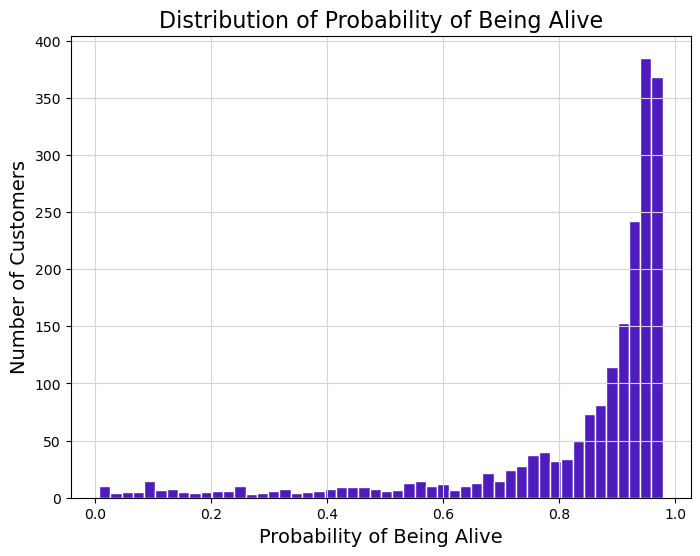

In [1]:
from zenq.visualizations.plot import Visuals
uf = Visuals()

# result = uf.total_sales_by_location()

# result = uf.price_distribution()
# result = uf.time_series()
# result = uf.gender_price()
# result = uf.rfm_treemap()
# result = uf.lowest_customers_90days()


# result = uf.customer_aliveness()
result = uf.customer_aliveness()


result
